In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
columns = ['Class', 'Text']
data = pd.read_csv('/content/SMSSpamCollection.txt', sep = '	', header = None)
data.columns = columns

In [3]:
data

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Смотрим на распределение классов, видим что сообщений, отмеченных как спам, намного меньше чем хороших

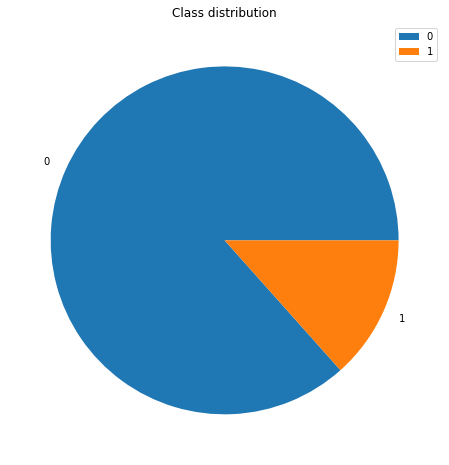

In [4]:
data = data.replace(('ham', 'spam'), (0, 1))
plt.figure(figsize=(8, 8))
plt.pie(data.iloc[:, 0].value_counts(), labels = (0, 1))
plt.legend()
plt.title('Class distribution')
None

# Также полезно посмотреть, нет ли в датасете пропусков данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   int64 
 1   Text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


# Так как наивный Байес не умеет обрабатывать текст, сгенерируем пару фичей: посчитаем длину каждого сообщения и проверим их на наличие некоторых паттернов

In [7]:
data['length'] = None
data['Is_trash'] = None
for i in range(len(data['length'])):
  data.iloc[i, 2] = len(data.iloc[i, 1])
  if bool(re.search(('//'), data.iloc[i, 1])) or bool(re.search(('/'), data.iloc[i, 1])) or bool(re.search(('^\d+'), data.iloc[i, 1])) or bool(re.search(('£'), data.iloc[i, 1])) or bool(re.search(('free'), data.iloc[i, 1])) or bool(re.search(('FREE'), data.iloc[i, 1])):
    data.iloc[i, 3] = 1
  else:
    data.iloc[i, 3] = 0

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [9]:
cat_col = pd.get_dummies(data['Is_trash'])

In [10]:
target = data['Class']
features = np.concatenate((data.drop(columns = ['Class', 'Text', 'Is_trash']), cat_col), axis = 1)

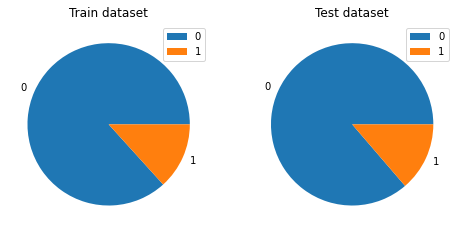

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.pie(y_train.value_counts(), labels = (0, 1))
plt.legend()
plt.title('Train dataset')
plt.subplot(1, 2, 2)
plt.pie(y_test.value_counts(), labels = (0, 1))
plt.legend()
plt.title('Test dataset')
None

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report

# Благодаря выделению удачных паттернов в сообщениях, удалось достичь приемлемого качества:

In [16]:
from sklearn.metrics import classification_report

print("Тестовая выборка")
print(classification_report(y_test, preds))

Тестовая выборка
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1443
           1       0.83      0.69      0.75       229

    accuracy                           0.94      1672
   macro avg       0.89      0.83      0.86      1672
weighted avg       0.93      0.94      0.93      1672

